This notebook will guide you through the utilisation of ardent, via the analysis of TOI-1736. This system contains an inner sub-Neptune with an orbital period of 7 days, and an outer eccentric cold giant (P=570 days, e=0.36). Here, we use the published SOPHIE data (Martioli et al. 2023) to derive dynamical detection limits. These take into account both the RV data at hand and the stability constraints to quantify the completeness of the system. 

Follow the ardent installation instructions before running this tutorial. 

In [1]:
import numpy as np
import os
import ardent 

##### RV data and system parameters

Retrieve the residual RV timeseries, where the best-fit model was removed. The residual RVs are put in the file 'TOI1736_sophie_residualRV.dat' that you can find in the same folder as this tutorial. 

Initialise an ardent object with this timeseries. 

In [2]:
# For this tutorial, use the RV file 'TOI1736_sophie_residualRV.dat' located in the same folder.
data = np.genfromtxt('TOI1736_sophie_residualRV.dat', skip_header=int(2))
jdb, rv, rv_err = data[:,0:3].T

# Initialise ardent
vec = ardent.ARDENT_tableXY(jdb, rv, rv_err) 

# Add the star BEFORE defining an output folder
vec.ARDENT_AddStar(mass=1.08,starname='TOI-1736') # No space character allowed in star name

# Define an output folder that will contain the results of this ardent run
vec.ARDENT_Set_output_dir('HandsOnTuto')

Add the star and known planets into the ardent object

In [3]:
#ARDENT_AddPlanets(self, p=365.25, semi_major=np.nan, mean_long=0.0, mean_anomaly=np.nan, 
#                  e=0.0, omega=0.0, inc=90.0, asc_node=0.0, k=0.10, mass=np.nan)

# For a full list of argument definitions, check the docstrings

vec.ARDENT_AddPlanets(p=570.3, k=200.4, e=0.362, omega=164.3, asc_node = 0.0, mean_long=244.0, inc=70.0)
vec.ARDENT_AddPlanets(p=7.065, k=4.34, e=0.00, omega=0.0, asc_node = 0.0, mean_long=247.2, inc=90.0)


 [INFO] Mass calculated to be 2713.55 Earth mass

 [INFO] Semi-major axis calculated to be 1.38 AU

 [INFO] Planet parameters: 

          period  semimajor  mean_long  mean_anomaly    ecc  periastron   inc  \
planet 1   570.3   1.384325      244.0           NaN  0.362       164.3  70.0   

          asc_node  semi-amp         mass  
planet 1       0.0     200.4  2713.545811  

 [INFO] Mass calculated to be 13.71 Earth mass

 [INFO] Semi-major axis calculated to be 0.07 AU

 [INFO] Planet parameters: 

           period  semimajor  mean_long  mean_anomaly    ecc  periastron  \
planet 1  570.300   1.384325      244.0           NaN  0.362       164.3   
planet 2    7.065   0.073931      247.2           NaN  0.000         0.0   

           inc  asc_node  semi-amp         mass  
planet 1  70.0       0.0    200.40  2713.545811  
planet 2  90.0       0.0      4.34    13.707314  


Alternatively, you can import the planets via an input parameter file (in this case, named system_parameters.dat): 

In [4]:
vec.ARDENT_ImportPlanets('system_parameters.dat')

A built-in function allows to plot the planetary orbits, and saves the figure in the output folder 

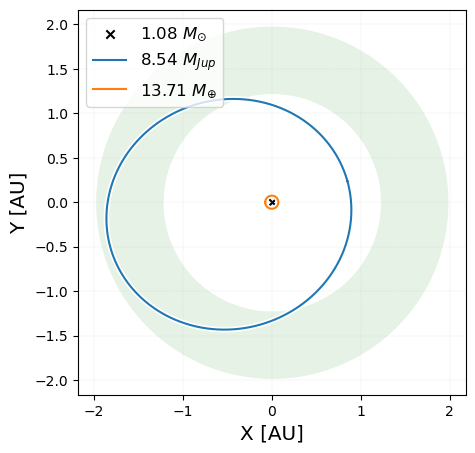

In [4]:
vec.ARDENT_PlotPlanets(new=True)

It is also possible to plot the residual RV timeseries and its generalised Lomb-Scargle (GLS) periodogram

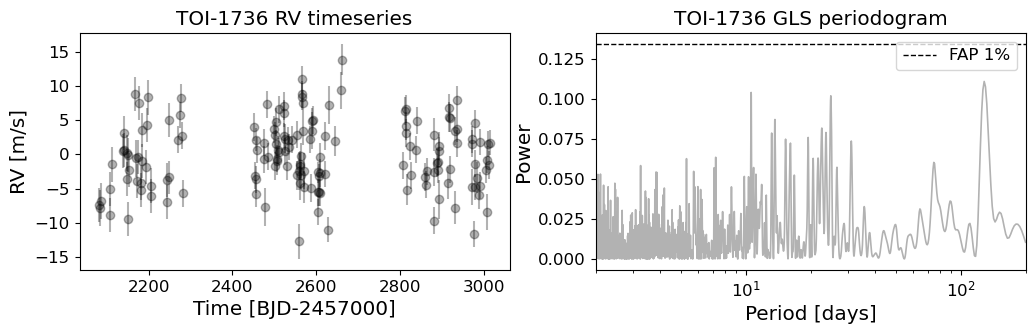

In [5]:
vec.ARDENT_Plot()

##### Data-driven detection limits

Now that you set up ardent, it is time to see if any additional planets could have been missed in the data! The specificity of ardent is that it computes not only the classic "data-driven" detection limits, but also tests the dynamical plausibility of additional planets in the system. As such, it creates new detection limits that take into account the orbital stablity, what we call for short the "dynamical detection limits". 

But first, let's compute the data-driven detection limits! It only takes 1 line of code. Here we want to know which planets could have been missed in the period range between 2 and 600 days. 

HandsOnTuto/TOI-1736_


  0%|▏                                        | 10/2000 [00:01<05:50,  5.68it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


  4%|█▍                                       | 71/2000 [00:12<05:40,  5.66it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 14%|█████▊                                  | 289/2000 [00:51<05:01,  5.67it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 31%|████████████▌                           | 629/2000 [01:51<04:00,  5.70it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 38%|███████████████▏                        | 758/2000 [02:14<03:42,  5.59it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 55%|█████████████████████▍                 | 1097/2000 [03:14<02:42,  5.56it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 77%|██████████████████████████████▏        | 1545/2000 [04:35<01:22,  5.54it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


 86%|█████████████████████████████████▍     | 1717/2000 [05:06<00:51,  5.51it/s]

No output of frequency error.
Increase frequency range to sample the peak maximum.


100%|███████████████████████████████████████| 2000/2000 [05:57<00:00,  5.59it/s]


 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 50% data-driven DL


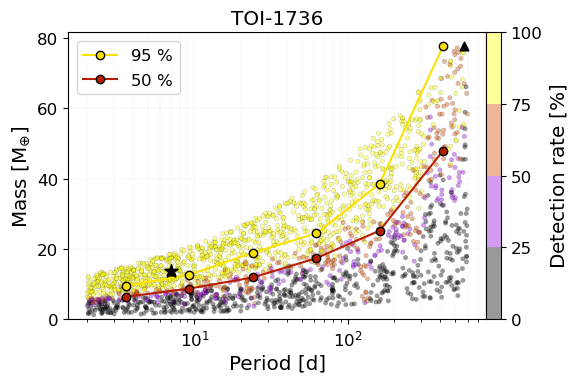

In [6]:
#ARDENT_DetectionLimitRV(self, rangeP=[2., 600.], rangeK=[0.1, 1.2], inc_inject=90., 
#                        fap_level=0.01, Nsamples=2000, Nphases=4)

# For a full list of argument definitions, check the docstrings

vec.ARDENT_DetectionLimitRV(rangeP=[2., 600.]) 

The above function executes injection-recovery tests, from which it computes the 50% and 95% data-driven detection limits in the mass-period space. In the output folder you'll find a file containing all the injection-recovery tests, a file for each detection limits curve (both 50% and 95%), and the resulting plot. 

If you're interested in the detection limits in units of RV semi-amplitude and not mass, you can create such a plot as below:

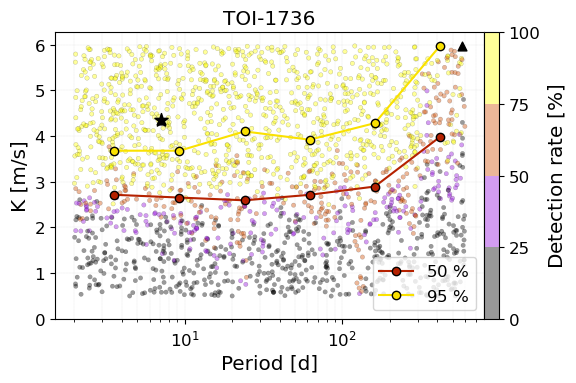

In [7]:
#ARDENT_Plot_DataDL(self, output_file=None, percentage=[50,95], nbins=6, axis_y_var='M', new=True, legend=True)

vec.ARDENT_Plot_DataDL(axis_y_var='K')

You can modify the percentage threshold of detection limits via the parameter ```percentage``` (default is [50,95]).

ARDENT offers also the possibility to compute RV detection limits automatically with general settings. This is particularly useful when analysing a large set of stars, because we do not have to specify settings for each of them. The range of periods, by default, is automatically calculated as 55% of the RV baseline (but again, you can modify this parameter when calling the function). To call this automatic RV detection limits function, use the following line: 

In [ ]:
#ARDENT_DetectionLimitRV_auto(self, rangeP=None, fap_level=0.01)

vec.ARDENT_DetectionLimitRV_auto()

##### Dynamical detection limits

The data-driven injection-recovery tests processed above are used as input for the computation of the dynamical detection limits. To launch the computation of the latter, it is again very simple: 

In [8]:
vec.ARDENT_DetectionLimitStab(NlocalCPU=4, InjectionRecoveryFile='HandsOnTuto/TOI-1736_InjectRecovTests_0.p')

 [INFO] Creation of an output file M-vs-P for 95% data-driven DL


/Users/manustalport/Documents/CHEOPS_ProdexLiege/DynamicalAnalyses/DynamicalDetectionLimits/TOI-1736/TestNewStabCriteria/ardent_functions.py:369: RuntimeWarning: divide by zero encountered in scalar divide
  gamma[i] = M[i] / M[i+1]
/Users/manustalport/Documents/CHEOPS_ProdexLiege/DynamicalAnalyses/DynamicalDetectionLimits/TOI-1736/TestNewStabCriteria/ardent_functions.py:380: RuntimeWarning: divide by zero encountered in scalar divide
  AMD[i] = C[i] / Lambda_ext[i+1]
/Users/manustalport/Documents/CHEOPS_ProdexLiege/DynamicalAnalyses/DynamicalDetectionLimits/TOI-1736/TestNewStabCriteria/ardent_functions.py:390: RuntimeWarning: invalid value encountered in scalar divide
  Cc_H = gamma[i] * alpha[i]**0.5 + 1 - (1+gamma[i])**1.5 * np.sqrt(alpha[i]/(gamma[i]+alpha[i]) * (1+3**(4./3.)*epsilon[i]**(2./3.)*gamma[i]/((1+gamma[i])**2)))



 [INFO] Processing stability estimation at period 2.462700[d] (bin 1 / 21)  <---------
 [INFO] Completed stability estimation at period 2.462700[d] (bin 1 / 21) <---------

 [INFO] Processing stability estimation at period 35.269000[d] (bin 14 / 21)  <---------
 [INFO] Completed stability estimation at period 35.269000[d] (bin 14 / 21) <---------

 [INFO] Processing stability estimation at period 161.420600[d] (bin 18 / 21)  <---------
 [INFO] Completed stability estimation at period 161.420600[d] (bin 18 / 21) <---------

 [INFO] Processing stability estimation at period 236.102300[d] (bin 19 / 21)  <---------
 [INFO] Completed stability estimation at period 236.102300[d] (bin 19 / 21) <---------

 [INFO] Processing stability estimation at period 345.335900[d] (bin 20 / 21)  <---------
 [INFO] Completed stability estimation at period 345.335900[d] (bin 20 / 21) <---------

 [INFO] Processing stability estimation at period 505.106700[d] (bin 21 / 21)  <---------
 [INFO] Completed stab

This computation will take a bit more time than the data-driven detection limits, since it is likely that several numerical integrations are needed in the process. On a MacBook Pro equipped with the M2 chip, this same computation took about 20 minutes with default integration timespans of 100k P_outer. Increasing the integration time (via the input parameter ```integration_time```) will strengthen the dynamical constraint, but also increase the computation time. For instance, running the dynamical detection limits with  ```integration_time``` set to 500k years takes about 2 hours. Hence it is a trade-off between the efficiency and computation time. 

Additionally, a hard minimum limit on the integration time must be respected for the stability estimation to converge. ARDENT measures chaos in a system via a simple estimation of the semi-major axes drift. The larger this drift, the more chaotic and unstable the system is. This drift can be reliably estimated only if the semi-major axis long-term cyclic variations are properly averaged out, implying a minimum timespan of integration required. As a rule of thumb, the period of secular variations depends on the ratio of the stellar mass over the planets mass, and on the orbital period of the outermost planet. 


Given that the above function is at the core of ardent, we introduce its arguments below. 

```ARDENT_DetectionLimitStab(self, NlocalCPU=1, InjectionRecoveryFile=None, param_file=None, nbins=15, integration_time=None, dt=None, Nphases=4, min_dist=3, max_dist=5, max_drift_a=0.2, GR=False, fine_grid=True, relaunch=False)```

+ ```NlocalCPU``` sets the number of CPU cores you want to dedicate to these numerical simulations on your local machine. A larger number will decrease the overall computation time, mostly speeding up the numerical integrations of the planetary orbits evolution. Ardent can also be run on a HPC cluster. In which case, set ```NlocalCPU``` to 0. From the HPC cluster, you can then specify the number of cores you want to dedicate, for instance via the slurm argument --array of sbatch. 

+ ```InjectionRecoveryFile``` is the path to the injection-recovery tests file, located inside your output folder. This argument is not needed if you process both data-driven and dynamical detection limits in the same session, in which case ardent kept the information in memory and does not need the output file. 

+ ```param_file``` is the path to the parameter file. This is the same file than the one that can be used to import the planets.  Again, it is not necessary but allows the user to employ input files instead of adding the parameters directly in the function, via the following arguments. 

+ ```nbins``` is the number of period bins where to compute the dynamical detection limits.

+ ```integration_time``` is the total time (in years) of each numerical integration. Default is 100k Pouter, which is a good trade-off between computation speed and reliable short-term stability estimation. 

+ ```dt``` is the numerical integration timestep, and is set by default to P_inner/50. Units are in years. 

+ ```Nphases``` The stability of each injected planet  (P, M) is tested for various initial orbital phases. ```Nphases``` indicates the number of different phases with which to inject each planet. The phase will be drawn evenly in [-pi,pi[. 

+ ```min_dist``` and ```max_dist``` are the minimum and maximum distance approach criteria (i.e., close encounter and escape criteria, respectively). ```min_dist``` is expressed in units of Hill radius of the innermost planet. ```max_dist``` is expressed in units of semi-major axis of the outermost planet a_outer. 

+ ```max_drift_a``` defines the stability criterion for the numerical simulations. It is a criterion on the maximum allowed relative drift in semi-major axis: abs(a(t2)-a(t1))/a(t0), where a(t1) and a(t2) are the median a over the first and second half of the integration, respectively, and a(t0) is the initial semi-major axis. Ardent computes this drift for all the planets in the system, and if at least one planet has a drift larger than ```max_drift_a```, the system is classified as unstable. By default, ```max_drift_a``` is set to 0.2, i.e. a maximum of 20% variation. 

+ ```GR``` A general relativity correction can be applied to the numerical simulations if needed. Simply set ```GR``` to True to activate this correction (default is False). 

+ ```fine_grid``` creates a denser period sampling around the periastron ad apastron of the known planets. Set to False to deactivate this option. 

+ ```relaunch``` is a parameter that tells ardent to re-run the detection limits computation and re-write the output files, even if such output files are already existing. 


Once ARDENT finished the computation of the stability constraints, we can plot the final detection limits! The following function plots and compares the data-driven and dynamical detection limits. 

Note: the arguments 'DataDLfile' (path to 95% data-driven detection limits) and 'DynDLfile' (path to dynamical detection limits) are not needed if you ran everything in the same session. 

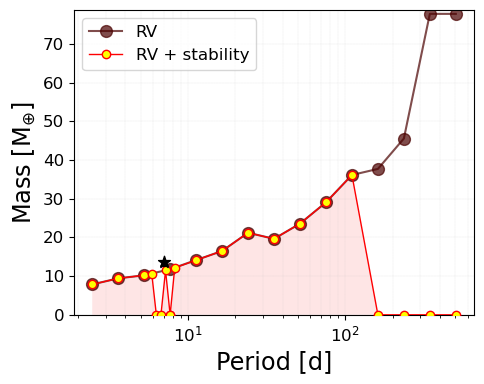

In [9]:
vec.ARDENT_Plot_StabDL(DataDLfile='HandsOnTuto/DataDL_M_perc95_0.dat', DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat')

Alternatively, you can also plot these detection limits in the orbital plane

 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL
 [INFO] Creation of an output file M-vs-P for 95% data-driven DL


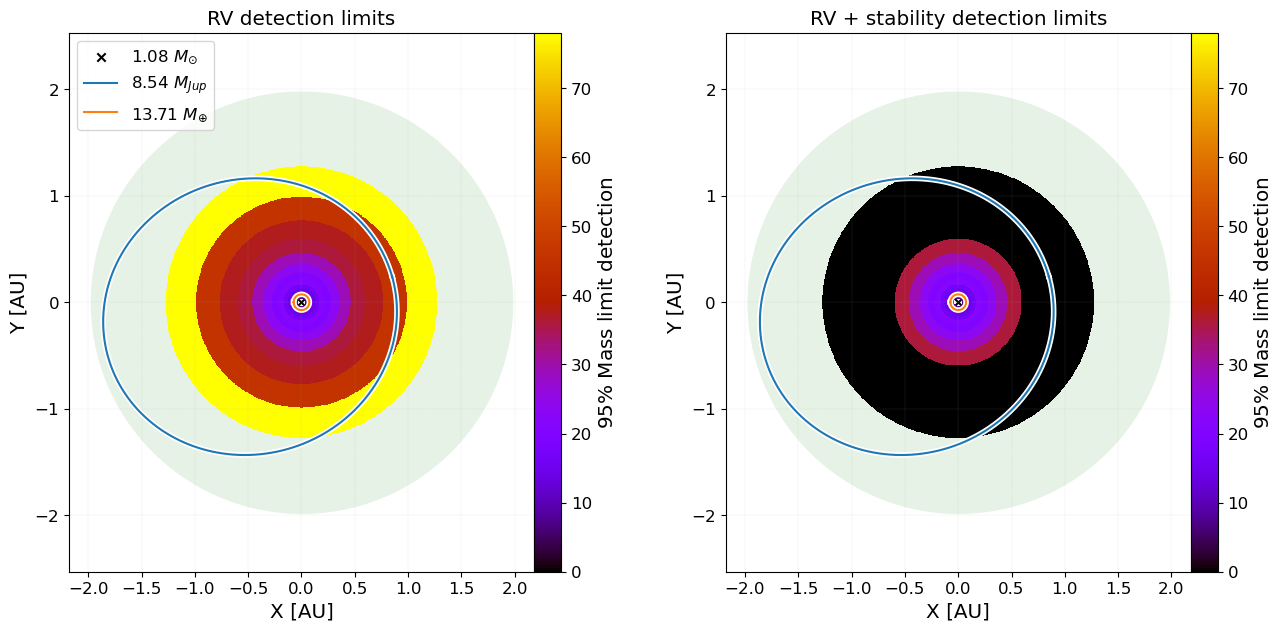

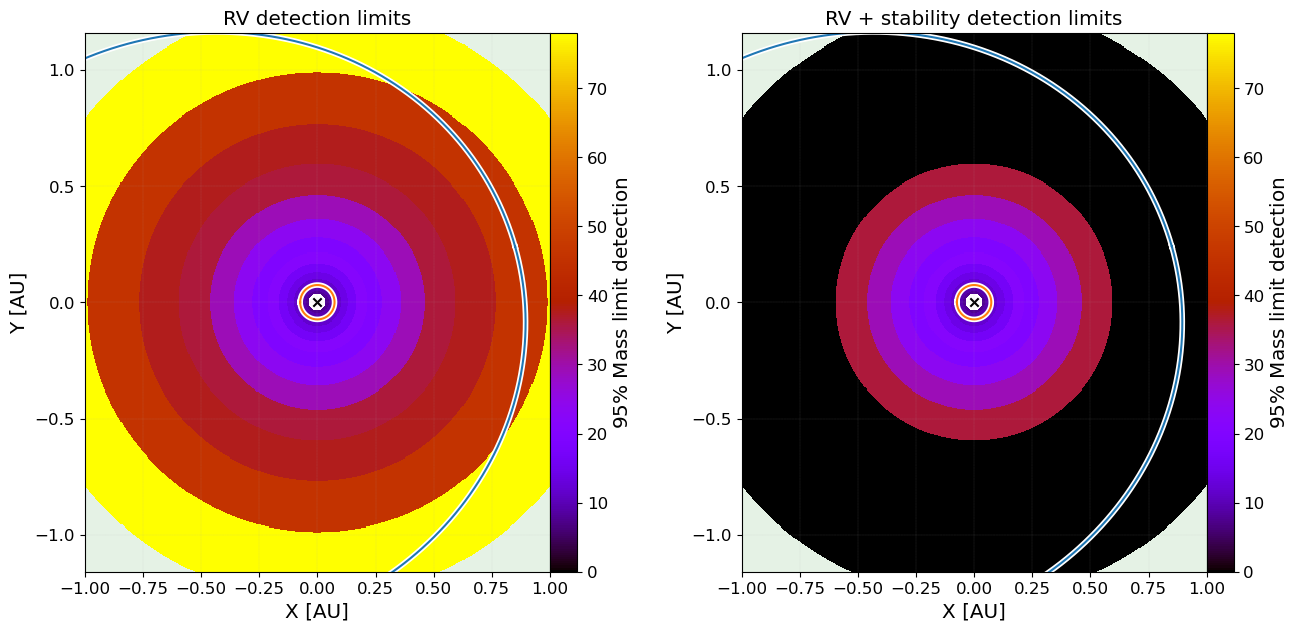

In [10]:
vec.ARDENT_FinalPlot(InjectionRecoveryFile='HandsOnTuto/TOI-1736_InjectRecovTests_0.p', DynDLfile='HandsOnTuto/TOI-1736_DynamicalDL_0.dat')

### Investigate the stability of a potential planet at ~130 days

Going back to the plot of data-driven detection limits, we note higher detection rates around 130 days (the injected planets are detected at lower masses). This is probably due to the peak observed in the periodogram of the RV residuals around that period. Injecting a planet around 130 days creates a RV signal that interacts with this residual signal, and bumps up the combined signal. While the signal at 130 days is not significant in terms of FAP, a pressing question is "Is this signal a valid planet candidate?". 

There are several ways to investigate the planetary nature of a signal. Prior to digging into the data analyses, one might be tempted to test the orbital stability of a specific solution (such as the best fit model). A function in ARDENT does just that. Of course, we will not be able to firmly exclude, or validate, the planetary nature of the signal with this test. But this is a first step to get insights. 

We fit a third Keplerian from the highest residual peak, which provides an estimation of the mass (23.27 M_Earth) and period (128.74 days) of this potential planet candidate. Note: DACE is a great tool to undertake this step (https://dace.unige.ch/radialVelocities/). 

Then we test the orbital stability of this 3-planet solution with ARDENT. Specifying the period and mass only, ardent will suppose a null eccentricity, but you can change the input orbital parameters as you wish. 

In [11]:
#ARDENT_TestStability(self, P_inject, m_inject, ML_inject=0., MA_inject=None, e_inject=0., w_inject=0., 
#                     inc_inject=90., ascnode_inject=0., param_file=None, integration_time=None, dt=None, 
#                     min_dist=3, max_dist=5, Noutputs=1000, GR=False, relaunch=False)

vec.ARDENT_TestStability(P_inject=128.74, m_inject=23.27, relaunch=True)

 [INFO] --Long term stability-- Start of the numerical integration 


 46%|██████████████████▎                     | 459/1000 [17:29<20:36,  2.29s/it]

 [INFO] --Long term stability-- Simulation stopped! Close encounter. 


This function runs a numerical evolution with WHFast (REBOUND), for a default timescale of 1 million orbits of the outermost planet and an integration timestep of P_inner/100. It evenly records some orbital elements (semi-major axis, eccentricity, and argument of periastron) during the simulation. These can be later used to trace the orbital evolution of the planets. The simulation reaches the end unless a close encounter or escape is happening, in which case the simulation stops and indicates the cause of it. 

In our case, the system was unstable (close encounter) before the end of the simulation! From the generated output file, we can investigate the system evolution. The following function automatically plots the temporal evolution of semi-major axis, orbital eccentricity, and argument of periastron for each of the planets. 

 [INFO] Preparing plot of the temporal evolution of the orbital elements. 


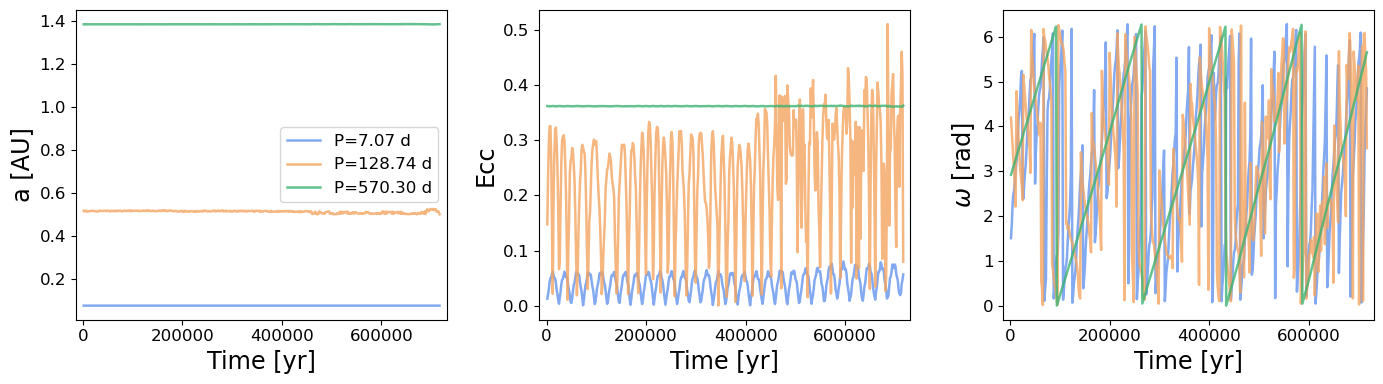

In [12]:
# ARDENT_PlotOrbitalElements(self, P_inject, m_inject, output_file=None, Noutputs=1000) 

vec.ARDENT_PlotOrbitalElements(128.74, 23.27, output_file='HandsOnTuto/TOI-1736_TestStability_P128.7_m23.3.dat') 

Ploting the orbital evolution shows that the additional candidate at ~130 days has a chaotic orbit. After some time it reaches large orbital eccentricities, which ultimately lead to the close encounter. 

Note that due to the chaotic nature of this system, your own run might lead to a different outcome (different amplitudes of variation, different timing for the instability). The reason is that initially small numerical round-point errors grow exponentially with time in the presence of chaos, so that two simulations with identical input values can lead to different final results. 